In [1]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [19]:
'''
Для экспоненциальной 
params : lambda_
Для гамма 
params : a, 1/scale
first - случайная величина X_1, params_first - ее параметры
'''
def renewal(t, var='exp', *params, first=None, params_first=list()):
    S = 0
    k = 0

    if first == 'exp':
        S += stats.expon.rvs(loc=0, scale=1/params_first[0], size=1)[0]
        k += 1
    elif first == 'gamma':
        S += stats.gamma.rvs(params_first[0], loc=0, scale=1/params_first[1], size=1)[0]
        k += 1
    
    while S <= t:
        if var == 'exp':
            S += stats.expon.rvs(loc=0, scale=1/params[0], size=1)[0]
        elif var == 'gamma':
            S += stats.gamma.rvs(params[0], loc=0, scale=1/params[1], size=1)[0]
            
        k += 1
    return k - 1, S

vrenewal = np.vectorize(renewal)

<h3> №10.1

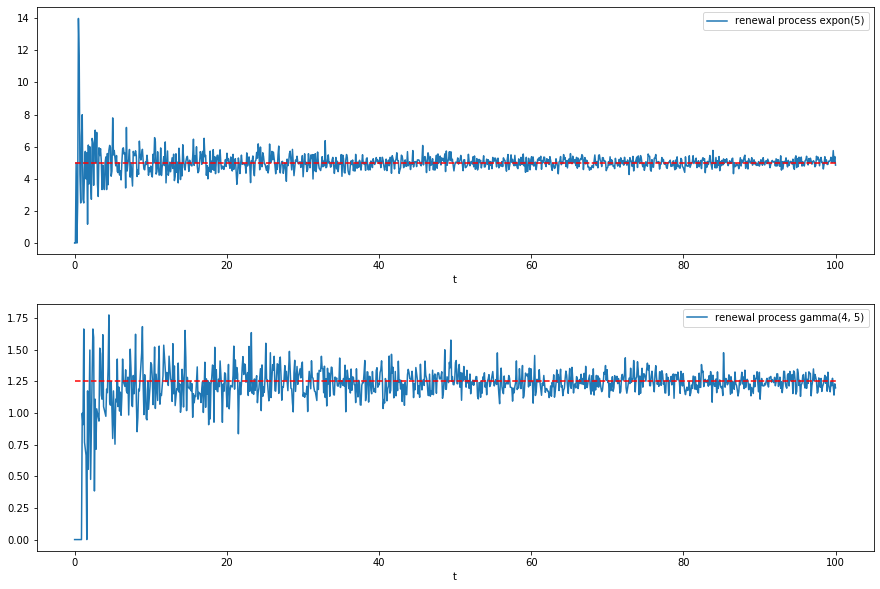

In [30]:
domain = np.linspace(1e-6, 100, 1000)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
ax[0].plot(domain, vrenewal(domain, 'exp', 5)[0]/domain, label='renewal process expon({})'.format(lambda_))
ax[0].plot(domain, [lambda_]*len(domain), '--r')
ax[0].legend()
ax[0].set_xlabel('t')

ax[1].plot(domain, vrenewal(domain, 'gamma', 4, 5)[0]/domain, label='renewal process gamma({}, {})'.format(a, lambda_))
ax[1].plot(domain, [lambda_/a]*len(domain), '--r')
ax[1].legend()
ax[1].set_xlabel('t')

plt.show()

<h3> №10.2

In [21]:
def excess_distribution(t, iter_, var='exp', *params, first='exp', params_first=[5]):
    excess = list()
    for i in range(iter_):
        excess.append(renewal(t, var, *params, first, params_first)[1] - t)
    plt.hist(excess, label='Random value:{}, t={}'.format(var, t))
    plt.legend()
    plt.show()
    
    print('Оценка матем. ожидания: {}'.format(np.mean(excess)))

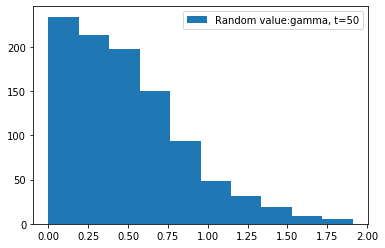

Оценка матем. ожидания: 0.49571326635378987


In [27]:
excess_distribution(50, 1000, 'gamma', 4, 5)

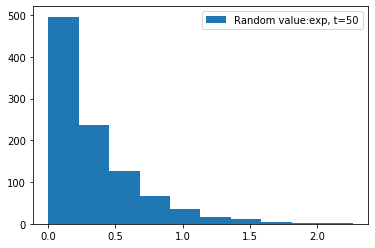

Оценка матем. ожидания: 0.3402138315896907


In [25]:
excess_distribution(50, 1000, 'exp', 3)

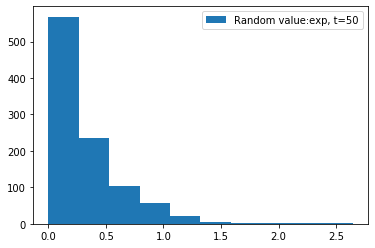

Оценка матем. ожидания: 0.32241528415152004


In [32]:
excess_distribution(50, 1000, 'exp', 3, 'gamma', [4, 1/5])